In [1]:
import pandas as pd
df_insurance=pd.read_csv("https://raw.githubusercontent.com/ind-kum/Datasets/master/Insurance_Dataset.csv")
df_insurance

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [2]:
#lets chcek whether there are null values or not
df_insurance.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [3]:
#lets chcek the datatypes
df_insurance.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [4]:
#lets chcek the correlation matrix
df_insurance.corr()
#here correlation between column "smoker" and "charges" are quite significant

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [5]:
#lets describe the matrix
df_insurance.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


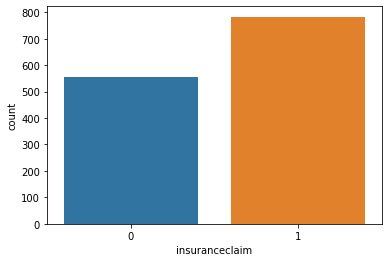

In [6]:
#Lets chcek the count of each class in target varaible
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="insuranceclaim",data=df_insurance)
plt.show()
#here we we see data is imbalanced but both the classes have significant number of instances

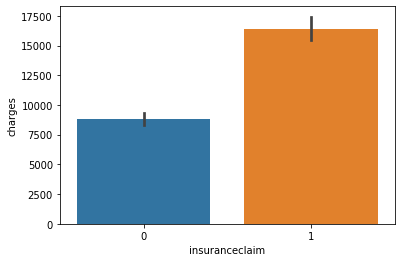

In [7]:
#Lets compare the average charges who claimed with average charges wh didnt
sns.barplot(x="insuranceclaim",y="charges",data=df_insurance)
plt.show()

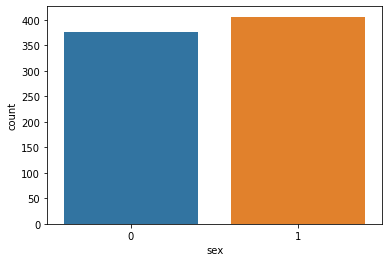

In [8]:
#lets chcek count male and female among who claimed insurance
sns.countplot(x="sex",data=df_insurance.loc[df_insurance["insuranceclaim"]==1])
plt.show()
#Almost equal number males and females are there who claimed insurance

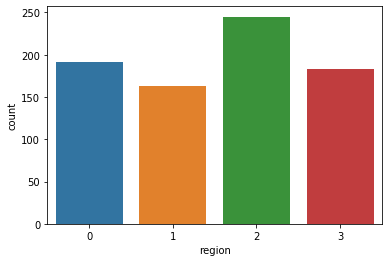

In [9]:
#Lets chcek higher number of claims are from which region
sns.countplot(x="region",data=df_insurance.loc[df_insurance["insuranceclaim"]==1])
plt.show()
#highest number of claims are from region 2

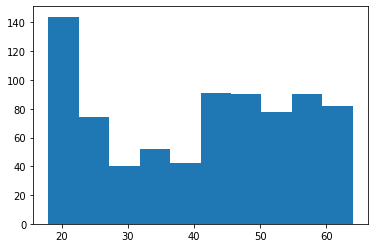

In [10]:
#we will chcek in which age interval claims are high
plt.hist(x="age",data=df_insurance.loc[df_insurance["insuranceclaim"]==1])
plt.show()

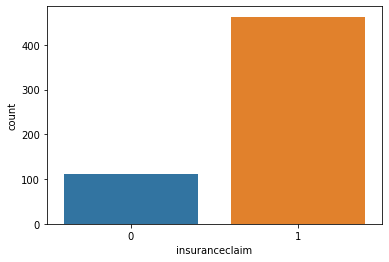

In [11]:
#lets chcek claims made by person not having the children
sns.countplot(x="insuranceclaim",data=df_insurance.loc[df_insurance["children"]==0])
plt.show()
#here claims made are far higher than non -claimers i.e more than 4 times

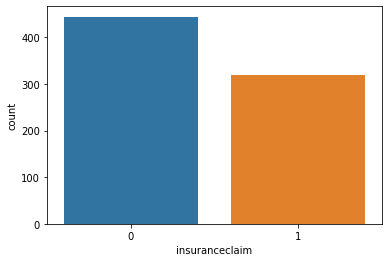

In [12]:
#lets chcek claims made by person not having children
sns.countplot(x="insuranceclaim",data=df_insurance.loc[df_insurance["children"]!=0])
plt.show()

In [13]:
#lets seprate the input and output variable
df_x=df_insurance.drop(columns=["insuranceclaim"])
y=df_insurance[["insuranceclaim"]]

In [14]:
#lets bring all features to common scale as we will be using logistic,svm.knn algos
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [15]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [16]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,x,y)

maximum f1_score is at random state : 97  and it is : 0.9274447949526814


In [17]:
#lets use cross_val_score
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for logistic classifier:  0.8974301207825608
standard deviation in f1 score for logistic classifier:  0.013247504030284553
[0.88673139 0.90342679 0.90342679 0.9153605  0.87820513]


In [18]:
#Lets use deciision tree classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,df_x,y)

maximum f1_score is at random state : 97  and it is : 1.0


In [19]:
#lets use cross_val_score
print("Mean f1 score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="f1").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="f1"))

Mean f1 score for decision tree classifier:  0.9835035411863269
standard deviation in f1 score for decision tree classifier:  0.013062274772534913
[1.         0.96835443 0.97468354 0.98076923 0.98412698]


In [20]:
#lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="f1")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 100}

In [21]:
rf_clf=RandomForestClassifier(n_estimators=100)
maxf1_score(rf_clf,df_x,y)

maximum f1_score is at random state : 97  and it is : 0.9808917197452229


In [22]:
#lets check cross_val_score
print("Mean f1 score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="f1").std())
print(cross_val_score(rf_clf,df_x,y,cv=5,scoring="f1"))

Mean f1 score for random forest classifier:  0.9614260055530085
standard deviation in f1 score for random forest classifier:  0.01049595615042798
[0.95512821 0.95819936 0.96178344 0.98402556 0.93811075]


In [23]:
#lets use decision tree classifier as our final model as it is performing better than other models
#random state we can use as 97 what we obtained from above
x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = 97,test_size=0.20,stratify=y)
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
#so we achived perfect score using decision trees

Confusion matrix 
 [[111   0]
 [  0 157]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       157

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

AUC ROC Score:  1.0


In [25]:
#Lets save this model using joblib
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(dc, 'insurance_dataset.pkl')

['insurance_dataset.pkl']